# Which "Strokes Gained" Statistic has the Biggest Impact on a Golfer's Performance

## Background

I have been playing golf since I was 3 years old. I watch almost every event each week on the PGA Tour. Recently, with sports betting becoming legal in New York I began to wonder how these sportsbooks pick which golfers are the favorites each week and how they set their lines for betting. This got me wondering out of the 'Strokes Gained' stats have the highest impact to a golfer finishing higher for the event. 

For this project I am going to be using data from the 2021 PGA Tour season and seeing on average what stat or stats, outside of total strokes, had the bigger impact on a golfer's performance. I want to use this information that will find to help my own game and see what part of my game matters more than others. I will use it to choose what I will focus more on that while I practice to hopefully lower my scores. 

## Literature Review 

Looking through the internet I was never able to find any studies that did what I am trying to do. I did however find a lot of thread with people discussing things they have done on their own time who were curious just like I was about this same topic. Most of them would try to correlate the different stats and see what had a bigger impact. I also know that a lot of fantasy golf sites use this type of information that I am trying to find in order to give their recommendations for who to start each week. I did find an article, from the beginning of 2021, on [Golf Digest](https://www.golfdigest.com/story/golf-stats-that-matter-most-which-skills-correlate-to-success-on-the-pga-tour#:~:text=The%20top%20six%20are%3A%20SG,functions%20as%20good%20quality%20control.) which talked about the strokes gained stats and other available stats. They said the SG Approach was a biggest factor in a golfer's performance. 

The website I got my data from is [Advanced Sports Analytics](https://www.advancedsportsanalytics.com/) and they use the data for fantasy golf purposes. They do it for all major sports, not just the PGA Tour, such as the NFL, NBA, MLB and NHL. 

## Research Question

Which 'Strokes Gained' statistic has the biggest correlation with the finishing position of a PGA Tour golfer in a tournament? 

I personally believe, based off my experience with golf and playing in tournaments throughout my time in middle and high school, that putting will have the biggest impact. I think this because when I play or watch others play, most golfers loose a lot of strokes from missing putts. 

## Strokes Gained Stats Explained

All of the 'Strokes Gained' (SG) stats measure a players performance in the paticular category to the rest of the field in that tournament. All the different types of shots have a baseline number that is used to calculate a player's SG stat. 
- SG Total: Simply compares a player's score to the field average or works out to be SG Tee to Green + SG Putting. 
- SG Tee to Green: SG Off the Tee + SG Approach + SG Around the Green
- SG Off the Tee: Measures players performance off the tee on all par-4s and par-5s.
    - Average Shots to hole out (from the tee):
        - 3.0 shots from 166 yards
        - 4.0 shots from 410 yards
        - 4.5 shots from 519 yards
- SG Approach: This includes all shots that are not from the tee on a par-4 and par-5 and not included in the SG Around the Green and SG Putting stats as well as tee shots on par-3s. 
- SG Around the Green: Measures a players performance on any shot within 30 yards of the edge of the green.
    - Average shots to hole out (from the fairway):
        - 2.0 shots from 7 yards
        - 2.5 shots from 30 yards
        - 3.0 shots from 168 yards
- SG Putting: Measures the players performance on the putting green. 
    - Average shots to hole out (while putting): 
        - 1.0 shots from 1 foot
        - 1.5 shots from 8 feet
        - 2.0 shots from 33 feet
        
There are probablities of shots need to hole out for every distance and whether it is in the fairway, rough, bunker or other lies. For example, 168 yards from the fairway has an average of 3.0 shots to hole out and 100 yards from the rough has the same average of 3.0 shots to hole out. I just included the baselines for an example to see and understand where these numbers are coming from. 

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

This data set is of all players who played in a PGA Tour event in the 2021 season along with placement in every tournament they competed in and other stats of their during that event. 

## Cleaning up the Data

In [6]:
df = pd.read_csv('rawdata.csv')
df

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,9.0,2021,1,T9,0.16,-0.33,0.59,-0.11,0.15,0.31
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,9.0,2021,1,7,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,9.0,2021,1,T9,0.45,-0.07,0.30,0.64,0.86,1.31
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,9.0,2021,1,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,9.0,2021,1,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,W. McGirt,401219793,3532,288,284,64.0,59.6,64,0,12.0,...,6.6,2021,0,T67,-0.71,-0.62,0.32,0.14,-0.16,-0.86
5684,W. Roach,401219793,6185,144,141,35.0,31.9,34,0,6.0,...,6.6,2021,0,CUT,-0.59,0.54,0.21,-0.31,0.44,-0.15
5685,X. Zhang,401219793,4479,288,273,83.5,81.8,83,6,17.8,...,6.6,2021,0,T14,0.44,-0.05,1.19,0.29,1.44,1.89
5686,Z. Blair,401219793,9040,144,140,34.0,32.8,36,3,6.8,...,6.6,2021,0,CUT,0.02,0.16,0.13,0.03,0.33,0.35


There is a lot of extra data in this that I either do not need for the purpose of this research or shows up in two different columns. So I am going to go through it and drop what is not needed or doubled. The extra data is what the website I got the data from uses for their fantasy golf predictions but I do not need that. 

In [8]:
cleaned = df.drop(['Player_initial_last','tournament id','hole_par','hole_DKP','hole_FDP','hole_SDP','streak_DKP','purse','season','no_cut'],axis=1)

In [9]:
cleaned

,player id,strokes,streak_FDP,streak_SDP,n_rounds,made_cut,pos,finish_DKP,finish_FDP,finish_SDP,...,tournament name,course,date,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,9261,274,11.0,4,4,1,9.0,8,7,5,...,Tour Championship,"East Lake Golf Club - Atlanta, GA",2021-09-05,T9,0.16,-0.33,0.59,-0.11,0.15,0.31
1,10046,274,18.4,3,4,1,7.0,10,10,7,...,Tour Championship,"East Lake Golf Club - Atlanta, GA",2021-09-05,7,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,1651,270,22.0,11,4,1,9.0,8,7,5,...,Tour Championship,"East Lake Golf Club - Atlanta, GA",2021-09-05,T9,0.45,-0.07,0.30,0.64,0.86,1.31
3,6798,138,0.2,0,2,0,NaN,0,0,0,...,Tour Championship,"East Lake Golf Club - Atlanta, GA",2021-09-05,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,9126,278,7.2,0,4,1,22.0,4,3,1,...,Tour Championship,"East Lake Golf Club - Atlanta, GA",2021-09-05,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,3532,284,12.0,0,4,1,67.0,0,0,0,...,Safeway Open,"Silverado Resort - Napa, CA",2020-09-13,T67,-0.71,-0.62,0.32,0.14,-0.16,-0.86
5684,6185,141,6.0,0,2,0,NaN,0,0,0,...,Safeway Open,"Silverado Resort - Napa, CA",2020-09-13,CUT,-0.59,0.54,0.21,-0.31,0.44,-0.15
5685,4479,273,17.8,7,4,1,14.0,6,5,3,...,Safeway Open,"Silverado Resort - Napa, CA",2020-09-13,T14,0.44,-0.05,1.19,0.29,1.44,1.89
5686,9040,140,6.8,3,2,0,NaN,0,0,0,...,Safeway Open,"Silverado Resort - Napa, CA",2020-09-13,CUT,0.02,0.16,0.13,0.03,0.33,0.35


There is still more that was not shown so I will continue to clean out the data.

In [5]:
cleaned2 = cleaned.drop(['streak_FDP','streak_SDP','n_rounds','made_cut','finish_DKP','finish_FDP','finish_SDP','tournament name','course','date','Finish'],axis=1)

In [6]:
cleaned2

,player id,strokes,pos,total_DKP,total_FDP,total_SDP,player,Unnamed: 2,Unnamed: 3,Unnamed: 4,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,9261,274,9.0,74.0,78.4,79,Abraham Ancer,NaN,NaN,NaN,0.16,-0.33,0.59,-0.11,0.15,0.31
1,10046,274,7.0,83.5,94.3,75,Bryson DeChambeau,NaN,NaN,NaN,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,1651,270,9.0,89.0,98.2,92,Billy Horschel,NaN,NaN,NaN,0.45,-0.07,0.30,0.64,0.86,1.31
3,6798,138,NaN,34.5,31.3,33,Brooks Koepka,NaN,NaN,NaN,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,9126,278,22.0,66.5,66.3,62,Corey Conners,NaN,NaN,NaN,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,3532,284,67.0,64.0,71.6,64,William McGirt,NaN,NaN,NaN,-0.71,-0.62,0.32,0.14,-0.16,-0.86
5684,6185,141,NaN,35.0,37.9,34,Wes Roach,NaN,NaN,NaN,-0.59,0.54,0.21,-0.31,0.44,-0.15
5685,4479,273,14.0,95.5,104.6,93,Xinjun Zhang,NaN,NaN,NaN,0.44,-0.05,1.19,0.29,1.44,1.89
5686,9040,140,NaN,37.0,39.6,39,Zac Blair,NaN,NaN,NaN,0.02,0.16,0.13,0.03,0.33,0.35


Still a few more cloumns to drop. 

In [7]:
cleaned3 = cleaned2.drop(['total_DKP','total_FDP','total_SDP','Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
cleaned3

,player id,strokes,pos,player,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,9261,274,9.0,Abraham Ancer,0.16,-0.33,0.59,-0.11,0.15,0.31
1,10046,274,7.0,Bryson DeChambeau,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,1651,270,9.0,Billy Horschel,0.45,-0.07,0.30,0.64,0.86,1.31
3,6798,138,NaN,Brooks Koepka,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,9126,278,22.0,Corey Conners,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...
5683,3532,284,67.0,William McGirt,-0.71,-0.62,0.32,0.14,-0.16,-0.86
5684,6185,141,NaN,Wes Roach,-0.59,0.54,0.21,-0.31,0.44,-0.15
5685,4479,273,14.0,Xinjun Zhang,0.44,-0.05,1.19,0.29,1.44,1.89
5686,9040,140,NaN,Zac Blair,0.02,0.16,0.13,0.03,0.33,0.35


Now I have the stats that I will be using to figure out my question. I am going to rename them to make it easier to read.  

In [9]:
names = {'pos':'Position','sg_putt':'SG Putting','sg_arg':'SG Around the Green','sg_app':'SG Approach','sg_ott':'SG Off the Tee','sg_t2g':'SG Tee to Green','sg_total':'SG Total'}
df = cleaned3.rename(columns=names)

In [10]:
df

,player id,strokes,Position,player,SG Putting,SG Around the Green,SG Approach,SG Off the Tee,SG Tee to Green,SG Total
0,9261,274,9.0,Abraham Ancer,0.16,-0.33,0.59,-0.11,0.15,0.31
1,10046,274,7.0,Bryson DeChambeau,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,1651,270,9.0,Billy Horschel,0.45,-0.07,0.30,0.64,0.86,1.31
3,6798,138,NaN,Brooks Koepka,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,9126,278,22.0,Corey Conners,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...,...,...,...
5683,3532,284,67.0,William McGirt,-0.71,-0.62,0.32,0.14,-0.16,-0.86
5684,6185,141,NaN,Wes Roach,-0.59,0.54,0.21,-0.31,0.44,-0.15
5685,4479,273,14.0,Xinjun Zhang,0.44,-0.05,1.19,0.29,1.44,1.89
5686,9040,140,NaN,Zac Blair,0.02,0.16,0.13,0.03,0.33,0.35


SG in this stands for 'strokes gained' which is the difference that player had in that stat compared to the average for the event. Higher being better in this case.

There are a few more columns I am going to get rid of that I missed because they are not needed for any calculations. 

In [11]:
df2 = df.drop(['player id','strokes','player'],axis=1)

In [12]:
df2

,Position,SG Putting,SG Around the Green,SG Approach,SG Off the Tee,SG Tee to Green,SG Total
0,9.0,0.16,-0.33,0.59,-0.11,0.15,0.31
1,7.0,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,9.0,0.45,-0.07,0.30,0.64,0.86,1.31
3,NaN,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,22.0,-0.21,-1.49,0.37,0.64,-0.48,-0.69
...,...,...,...,...,...,...,...
5683,67.0,-0.71,-0.62,0.32,0.14,-0.16,-0.86
5684,NaN,-0.59,0.54,0.21,-0.31,0.44,-0.15
5685,14.0,0.44,-0.05,1.19,0.29,1.44,1.89
5686,NaN,0.02,0.16,0.13,0.03,0.33,0.35


I got rid of the player's names as well just because it isn't going to be needed for anything. I will eventually index by position not name. 

For the position data when it has a null value it is because the player did not make the cut, or being inside of the top 70 with ties after the first two round, so they do not get a finishing position and so I am going to drop the null values. This is because there is no way to correlate their stats with their position since they don't have one.  

In [13]:
df2.dropna(inplace=True)

In [14]:
df2

,Position,SG Putting,SG Around the Green,SG Approach,SG Off the Tee,SG Tee to Green,SG Total
0,9.0,0.16,-0.33,0.59,-0.11,0.15,0.31
1,7.0,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,9.0,0.45,-0.07,0.30,0.64,0.86,1.31
4,22.0,-0.21,-1.49,0.37,0.64,-0.48,-0.69
5,26.0,-1.12,-0.22,-0.22,-0.38,-0.82,-1.94
...,...,...,...,...,...,...,...
5678,36.0,-0.09,0.97,0.20,0.06,1.23,1.14
5679,23.0,0.86,-0.02,-0.02,0.82,0.77,1.64
5682,61.0,-0.18,-0.96,-0.79,1.56,-0.19,-0.36
5683,67.0,-0.71,-0.62,0.32,0.14,-0.16,-0.86


That ended up dropping a little more than half of the rows.

Now that the data is cleaned up, we can start doing calculation to see if we can find an answer to our question. 

## Correlation 

In [15]:
corr = df2.corr()

In [16]:
corr

,Position,SG Putting,SG Around the Green,SG Approach,SG Off the Tee,SG Tee to Green,SG Total
Position,1.000000,-0.457556,-0.306172,-0.494927,-0.379511,-0.690781,-0.884372
SG Putting,-0.457556,1.000000,-0.046912,-0.110305,-0.057353,-0.130215,0.510472
SG Around the Green,-0.306172,-0.046912,1.000000,-0.032626,-0.030944,0.439689,0.352068
SG Approach,-0.494927,-0.110305,-0.032626,1.000000,0.062522,0.730997,0.565210
SG Off the Tee,-0.379511,-0.057353,-0.030944,0.062522,1.000000,0.531617,0.425325
SG Tee to Green,-0.690781,-0.130215,0.439689,0.730997,0.531617,1.000000,0.786095
SG Total,-0.884372,0.510472,0.352068,0.565210,0.425325,0.786095,1.000000


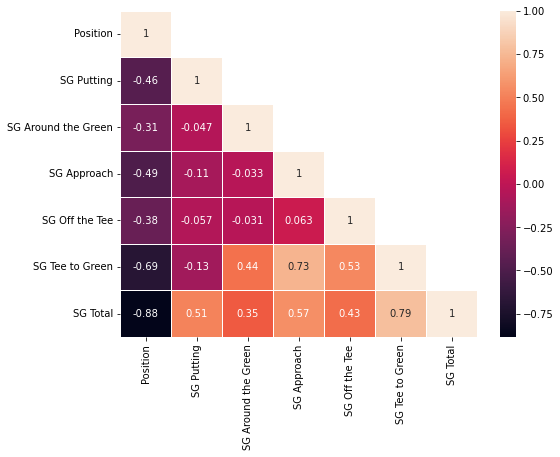

In [17]:
corr_lower = corr.where(np.tril(np.ones(corr.shape)).astype(bool))

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(corr_lower, annot=True, linewidths = 0.5)
ax.tick_params(axis='both', labelsize=10)

Since the golfer with the lower the position has the better performance, when looking at the correlations you have to take that into account. In this case the more negative a number is, when correlated with position, the bigger impact it has on a golfer's performance since, as the SG stat increases, the position will decrease shwoing a better performance. I am excluding 'SG Tee to Green' and 'SG Total' from consideration because they are a combination of other SG stats so they will always have a higher negative correlation with the gofler's final position. Based on the correlations, 'SG Putting' and 'SG Approach' have the bigger impacts on final poistion, with correlations of -0.46 and -0.49 respectively. 

## Graphing 

In [18]:
df3 = df2.set_index(['Position'])

In [19]:
df3

,SG Putting,SG Around the Green,SG Approach,SG Off the Tee,SG Tee to Green,SG Total
Position,,,,,,
9.0,0.16,-0.33,0.59,-0.11,0.15,0.31
7.0,-0.18,-0.36,-0.18,1.03,0.49,0.31
9.0,0.45,-0.07,0.30,0.64,0.86,1.31
22.0,-0.21,-1.49,0.37,0.64,-0.48,-0.69
26.0,-1.12,-0.22,-0.22,-0.38,-0.82,-1.94
...,...,...,...,...,...,...
36.0,-0.09,0.97,0.20,0.06,1.23,1.14
23.0,0.86,-0.02,-0.02,0.82,0.77,1.64
61.0,-0.18,-0.96,-0.79,1.56,-0.19,-0.36


I am indexing position so I can comebine the position stats together to make it easier to visualize with a graph. 

In [20]:
df4 = df3.groupby('Position').agg({'SG Putting':'mean', 'SG Around the Green':'mean', 'SG Approach':'mean', 'SG Off the Tee':'mean', 'SG Tee to Green':'mean', 'SG Total':'mean'})

In [21]:
df4

,SG Putting,SG Around the Green,SG Approach,SG Off the Tee,SG Tee to Green,SG Total
Position,,,,,,
1.0,1.118889,0.530278,1.245833,0.624444,2.403333,3.522500
2.0,0.957903,0.494839,1.049355,0.592903,2.139032,3.097258
3.0,1.036250,0.186500,1.277750,0.447000,1.911250,2.947750
4.0,0.818222,0.426000,0.859556,0.457556,1.743556,2.562889
5.0,0.883784,0.369189,0.822162,0.382432,1.572432,2.455405
...,...,...,...,...,...,...
77.0,-0.902500,-0.128750,-0.816250,-0.743750,-1.687500,-2.590000
78.0,0.090000,-0.560000,-0.965000,0.010000,-1.520000,-1.425000
79.0,-1.313333,-0.213333,-0.276667,-0.423333,-0.910000,-2.223333


Here I created a new DataFrame with all the position matching indicies merged and then the corresponding SG values were made by taking the mean of the the values that shared an index.  

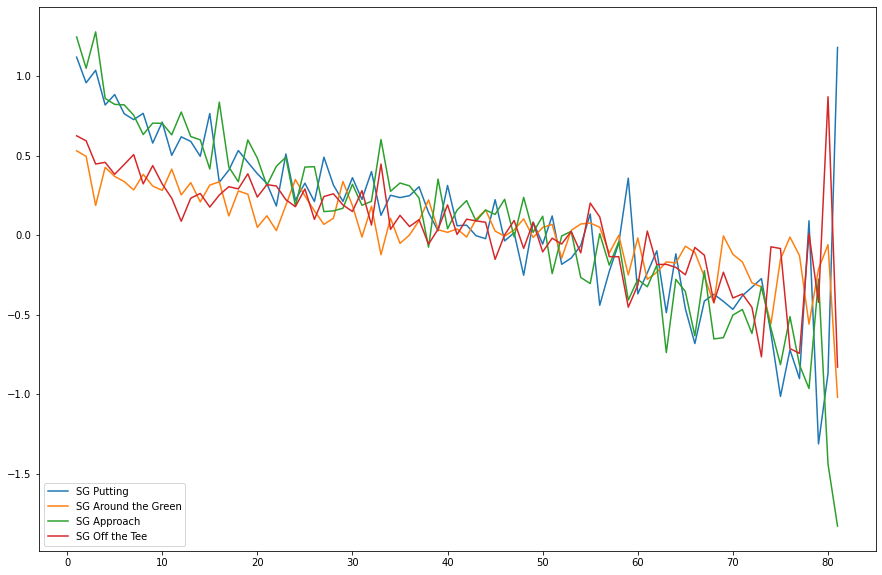

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df4['SG Putting'],label='SG Putting')
ax.plot(df4['SG Around the Green'],label='SG Around the Green')
ax.plot(df4['SG Approach'],label='SG Approach')
ax.plot(df4['SG Off the Tee'],label='SG Off the Tee')
ax.legend()
plt.show()

I expected it to have a downward sloping line. This shows that the all of these stats have a negeative correlation with position. Because the Putting and Approach stats have a steeper slope than Around the Green and Off the Tee it has a bigger affect on a player position.

You can also see that the SG Approach has the big drop off for the players that finished last and this shows that a player's approach shot makes a big difference in their ability to do well. 

In [23]:
hpcycleP, hptrendP = sm.tsa.filters.hpfilter(df4['SG Putting'])
hpcycleA, hptrendA = sm.tsa.filters.hpfilter(df4['SG Approach'])
hpcycleG, hptrendG = sm.tsa.filters.hpfilter(df4['SG Around the Green'])
hpcycleT, hptrendT = sm.tsa.filters.hpfilter(df4['SG Off the Tee'])

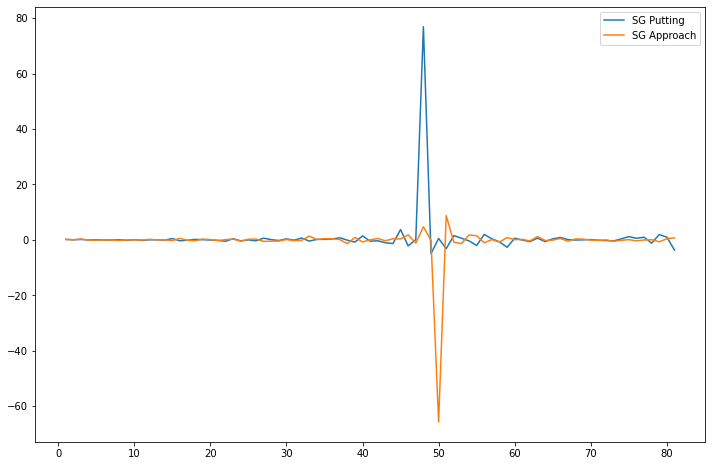

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(hpcycleP/hptrendP,label='SG Putting')
ax.plot(hpcycleA/hptrendA,label='SG Approach')
ax.legend()
plt.show()

This is showing that SG Putting is a little more volatile than SG Approach since it has a flatter line. This helps show that SG Approach is the slightly better indicator for a golfers performance because the higher the volatility the more a golfer can get away with not doing as well in that particular stat and still having a higher finish. I did not included the other two SG stats because I wanted to see the differrence in Putting and Approach since they were so close in correlation with position. 

I do wanna take a closer look at the too spikes and see what is causing them. 

In [29]:
info = ['SG Putting','SG Approach']
PA = df4[info]

Making a new DataFrame with just SG Putting and SG Approach so it is easier to follow because that is all we are looking at. 

In [30]:
PA.loc[42.0:52.0]

,SG Putting,SG Approach
Position,,
42.0,0.062414,0.216897
43.0,-0.004000,0.088286
44.0,-0.022727,0.157576
45.0,0.222500,0.130000
46.0,-0.036429,0.225000
47.0,0.014528,-0.010755
48.0,-0.252500,0.237143
49.0,0.081500,0.017000
50.0,-0.056744,0.118605


You can see at 48.0 there is a big change in SG Putting and at 51.0 there is a big change in SG Approach which would explain those two big spikes on the HP Trend Graph. I do want to see if I remove those numbers if it makes it easier to see the volatility difference. 

In [33]:
PA.reset_index()

,Position,SG Putting,SG Approach
0,1.0,1.118889,1.245833
1,2.0,0.957903,1.049355
2,3.0,1.036250,1.277750
3,4.0,0.818222,0.859556
4,5.0,0.883784,0.822162
...,...,...,...
76,77.0,-0.902500,-0.816250
77,78.0,0.090000,-0.965000
78,79.0,-1.313333,-0.276667
79,80.0,-0.870000,-1.440000


In [48]:
PA2 = PA.drop([45,46,47,48,49,50,51])

In [49]:
hpcycleP, hptrendP = sm.tsa.filters.hpfilter(PA2['SG Putting'])
hpcycleA, hptrendA = sm.tsa.filters.hpfilter(PA2['SG Approach'])

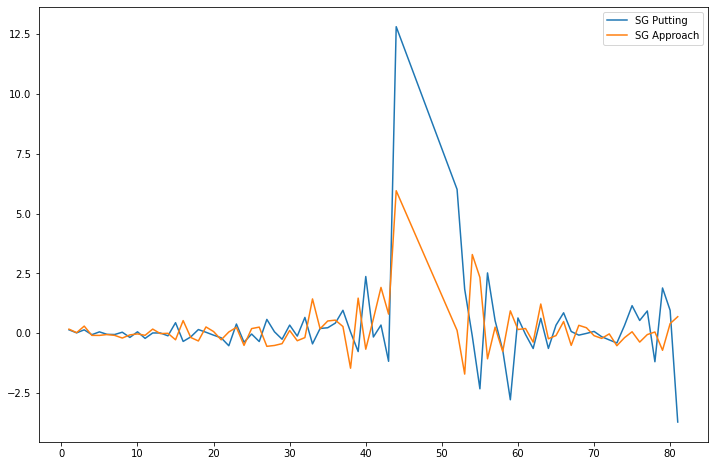

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(hpcycleP/hptrendP,label='SG Putting')
ax.plot(hpcycleA/hptrendA,label='SG Approach')
ax.legend()
plt.show()

It did help a little bit and it does make it easier to see that SG Putting is a little more volatile than SG Approach, showing players can get away with not doing as well with putting and still finish a higher position. 

In [51]:
PA.corr()

,SG Putting,SG Approach
SG Putting,1.000000,0.675798
SG Approach,0.675798,1.000000


It makes sense that these two stats have a higher correlation since these two stats have the highest correlation to performance and position finished. As a golfer does better in these two stats they will finish better than a golfer who does worse. This further proves that doing better in these two stats are the best at producing a better finish from a golfer. 

## Discussion and Conclusion 

After doing the calculations and visualizations I found that Strokes Gained Approach has the highest negative correlation with position, outside of the stats that combine multiple SG stats, at -0.49 and Strokes Gained Putting was a close second at -0.46. Since position is better when it is lower and SG statistics are better when they are higher, the more negatively correlated the two are the more impact the SG stat has on a golfer finishing better. This does match what was talked about in the Golf Digest article I linked in the beginning and shows that SG Approach is the most important stats for a golfer to do well in if they want to have a better finishing position. 

Doing these calculations confirmed my thoughts that putting was going to be a big factor into a golfers game. I did not however expect approach shots to be as big of a factor as it was. The more I thought about this outcome the more it made sense to me. The stroks gained putting does not take into account how many shots it took a golfer to get to the green, where the SG Approach does. Because of this, for example, it could have taken a player, player 1, 6 shots for a player to get to the green and then 1 putt for a 7 on the hole or a golfer, player 2, could have taken 2 shots to get to the green and then 2 putt for a 4 on the same hole. In this situation, player 1 will have a better SG Putting than Player 2 since player 1 had less putts but a worse SG Approach than player 2 because it took them more shots to get to the green. After all of this player 2 had a score 3 shots lower than player 1. If they would continue to do this throuhgout an entire round player 2 would have a worse SG Putting and a better SG Approach and finish with a much lower score than player 1.  

### Bibliography

https://www.golfdigest.com/story/golf-stats-that-matter-most-which-skills-correlate-to-success-on-the-pga-tour#:~:text=The%20top%20six%20are%3A%20SG,functions%20as%20good%20quality%20control.

https://www.advancedsportsanalytics.com/

https://www.pgatour.com/news/2016/05/31/strokes-gained-defined.html